In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [90]:
def extract_data(file, pos, nblocks, LenBlock=120, lineBeg=0):
    with open(file, 'r') as f:
        data = f.read().splitlines()
    times = []
    idx = (LenBlock + 2) * lineBeg
    for e in range(nblocks):
        idx += 1
        for i in range(LenBlock):
            line = data[idx]
            # nodes.append(float(line.split()[-1]) / float(line.split()[1]))
            times.append(float(line.split()[pos]))
            idx += 1
        idx += 1
    return times

In [91]:
def precoess_data(data):
    data = sorted(data)
    x = []
    y = []
    for i in range(len(data)):
        x.append(data[i])
        y.append((i + 1) / len(data))
    return x, y

In [92]:
def compute_ratio(data1, data2, divisor):
    ratio = []
    for i in range(len(data1)):
        if float(data1[i]) <= 0:
            continue
        ratio.append( 100 * (float(data1[i]) - float(data2[i])) / float(divisor[i]) )
    return ratio

In [93]:
def compute_InitRaito(data1, data2, data3, data4):
    ratio1 = []
    ratio2 = []
    for i in range(len(data1)):
        Upper = max(float(data1[i]), float(data2[i]))
        if data3[i] <= 0 or data4[i] <= 0:
            continue
        ratio1.append( 100 * (Upper - data3[i]) / Upper )
        ratio2.append( 100 * (Upper - data4[i]) / Upper )
    return ratio1, ratio2

In [94]:
def revise_data(x: list, y: list, startpoint, endpoint):
    if x[0] > startpoint:
        x.insert(0, startpoint)
        y.insert(0, 0)
    if x[-1] < endpoint:
        x.append(endpoint)
        y.append(1)

In [95]:
def extract_UB(file, begin, end, nblocks, LenBlock=120, lineBeg=0):
    with open(file, 'r') as f:
        data = f.read().splitlines()
    UB = []
    idx = (LenBlock + 2) * lineBeg
    for e in range(nblocks):
        idx += 1
        for i in range(LenBlock):
            line = data[idx]
            rows = [float(x) for x in line.split()[begin:end] if float(x) > 0]
            UB.append( min(rows) )
            idx += 1
        idx += 1
    return UB

In [96]:
def FilterUnsolvable(data1: list, data2: list, mask1: list, mask2: list):
    filter1 = []
    filter2 = []
    for i in range(len(data1)):
        if mask1[i] == 1 or mask2[i] == 1:
            filter1.append(data1[i])
            filter2.append(data2[i])
    return filter1, filter2

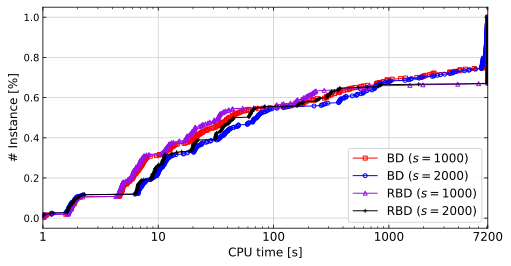

In [97]:
BDt1000 = extract_data('AllSummary1000', 5, 3)
BDt2000 = extract_data('AllSummary2000', 5, 3)
RBDt1000 = extract_data('RootSummary1000', 5, 3)
RBDt2000 = extract_data('RootSummary2000', 5, 3)

x1, y1 = precoess_data(BDt1000)
x2, y2 = precoess_data(BDt2000)
x3, y3 = precoess_data(RBDt1000)
x4, y4 = precoess_data(RBDt2000)

revise_data(x1, y1, 0.01, 7200)
revise_data(x2, y2, 0.01, 7200)
revise_data(x3, y3, 0.01, 7200)
revise_data(x4, y4, 0.01, 7200)

markersize = 4
linewidth = 1
fontsize = 12
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x1, y1, label=r'BD $(s = 1000)$', marker='s', markersize=markersize, color='r', linewidth=linewidth, markerfacecolor='none')
ax.plot(x2, y2, label=r'BD $(s = 2000)$', marker='o', markersize=markersize, color='b', linewidth=linewidth, markerfacecolor='none')
ax.plot(x3, y3, label=r'RBD $(s = 1000)$', marker='^', markersize=markersize, color='#9A0EEA', linewidth=linewidth, markerfacecolor='none')
ax.plot(x4, y4, label=r'RBD $(s = 2000)$', marker='+', markersize=markersize, color='k', linewidth=linewidth, markerfacecolor='none')

ax.set_xscale('log')
ax.set_xlim((1, 7200))
ax.set_xticks([1, 10, 100, 1000, 7200], ['1', '10', '100', '1000', '7200'], fontsize=fontsize)
ax.set_xlabel('CPU time [s]', fontsize=fontsize)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both')
ax.set_ylabel('# Instance [%]', fontsize=fontsize)
ax.grid(True, which='minor', linestyle='dashed', alpha=0)
ax.grid(True, which='major', alpha=0.6)
ax.legend(loc='lower right', fontsize=fontsize)
# plt.savefig('ICNode.eps', bbox_inches='tight', pad_inches=0, format='eps')

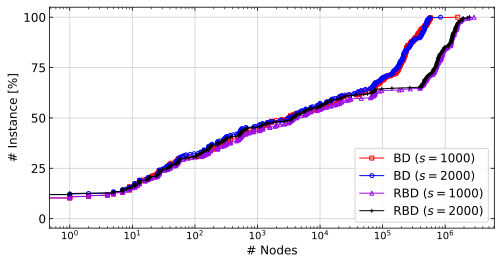

In [98]:
BDtick1000 = extract_data('AllSummary1000', 6, 3)
BDtick2000 = extract_data('AllSummary2000', 6, 3)
RBDtick1000 = extract_data('RootSummary1000', 6, 3)
RBDtick2000 = extract_data('RootSummary2000', 6, 3)

x1, y1 = precoess_data(BDtick1000)
x2, y2 = precoess_data(BDtick2000)
x3, y3 = precoess_data(RBDtick1000)
x4, y4 = precoess_data(RBDtick2000)

revise_data(x1, y1, 0.01, 7200)
revise_data(x2, y2, 0.01, 7200)
revise_data(x3, y3, 0.01, 7200)
revise_data(x4, y4, 0.01, 7200)

markersize = 4
linewidth = 1
fontsize = 12
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x1, y1, label=r'BD $(s = 1000)$', marker='s', markersize=markersize, color='r', linewidth=linewidth, markerfacecolor='none')
ax.plot(x2, y2, label=r'BD $(s = 2000)$', marker='o', markersize=markersize, color='b', linewidth=linewidth, markerfacecolor='none')
ax.plot(x3, y3, label=r'RBD $(s = 1000)$', marker='^', markersize=markersize, color='#9A0EEA', linewidth=linewidth, markerfacecolor='none')
ax.plot(x4, y4, label=r'RBD $(s = 2000)$', marker='+', markersize=markersize, color='k', linewidth=linewidth, markerfacecolor='none')

ax.set_xscale('log')
# ax.set_xlim((1, 7200))
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1], ['0', '25', '50', '75', '100'], fontsize=fontsize)
# ax.set_xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'], fontsize=fontsize)
ax.set_xlabel('# Nodes', fontsize=fontsize)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both')
ax.set_ylabel('# Instance [%]', fontsize=fontsize)
ax.grid(True, which='minor', linestyle='dashed', alpha=0)
ax.grid(True, which='major', alpha=0.6)
ax.legend(loc='lower right', fontsize=fontsize)
# plt.savefig('ICNode.eps', bbox_inches='tight', pad_inches=0, format='eps')


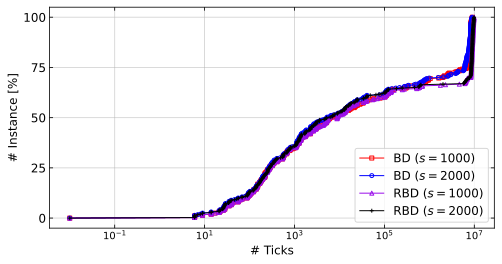

In [99]:
BDtick1000 = extract_data('AllSummary1000', 7, 3)
BDtick2000 = extract_data('AllSummary2000', 7, 3)
RBDtick1000 = extract_data('RootSummary1000', 7, 3)
RBDtick2000 = extract_data('RootSummary2000', 7, 3)

x1, y1 = precoess_data(BDtick1000)
x2, y2 = precoess_data(BDtick2000)
x3, y3 = precoess_data(RBDtick1000)
x4, y4 = precoess_data(RBDtick2000)

revise_data(x1, y1, 0.01, 7200)
revise_data(x2, y2, 0.01, 7200)
revise_data(x3, y3, 0.01, 7200)
revise_data(x4, y4, 0.01, 7200)

markersize = 4
linewidth = 1
fontsize = 12
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x1, y1, label=r'BD $(s = 1000)$', marker='s', markersize=markersize, color='r', linewidth=linewidth, markerfacecolor='none')
ax.plot(x2, y2, label=r'BD $(s = 2000)$', marker='o', markersize=markersize, color='b', linewidth=linewidth, markerfacecolor='none')
ax.plot(x3, y3, label=r'RBD $(s = 1000)$', marker='^', markersize=markersize, color='#9A0EEA', linewidth=linewidth, markerfacecolor='none')
ax.plot(x4, y4, label=r'RBD $(s = 2000)$', marker='+', markersize=markersize, color='k', linewidth=linewidth, markerfacecolor='none')

ax.set_xscale('log')
# ax.set_xlim((1, 7200))
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1], ['0', '25', '50', '75', '100'], fontsize=fontsize)
# ax.set_xticks([10, 100, 1000, 10000, 100000], ['10', '100', '1000', '10000', '100000'], fontsize=fontsize)
ax.set_xlabel('# Ticks', fontsize=fontsize)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both')
ax.set_ylabel('# Instance [%]', fontsize=fontsize)
ax.grid(True, which='minor', linestyle='dashed', alpha=0)
ax.grid(True, which='major', alpha=0.6)
ax.legend(loc='lower right', fontsize=fontsize)
# plt.savefig('ICNode.eps', bbox_inches='tight', pad_inches=0, format='eps')


In [100]:
UBA2000 = extract_UB('AllisIntCut2000.text', 1, 5, 3)
UBA1000 = extract_UB('AllisIntCut1000.text', 1, 5, 3)
UBR2000 = extract_UB('RootisIntCut2000.text', 1, 5, 3)
UBR1000 = extract_UB('RootisIntCut1000.text', 1, 5, 3)

In [101]:
def extract_LUdata(file, LenBlock=60):
    U1 = extract_data(file, 1, 3, LenBlock=LenBlock)
    U2 = extract_data(file, 2, 3, LenBlock=LenBlock)
    L1 = extract_data(file, 3, 3, LenBlock=LenBlock)
    L2 = extract_data(file, 4, 3, LenBlock=LenBlock)
    return U1, U2, L1, L2

360


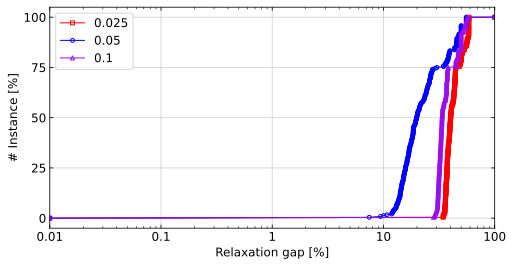

In [102]:
U2000 = [min(UBA2000[i], UBR2000[i]) for i in range(len(UBA2000))]
U1000 = [min(UBA1000[i], UBR1000[i]) for i in range(len(UBA1000))]

Relax1 = extract_data('RelaxLb1000.text', 1, 3, lineBeg=0)
Relax2 = extract_data('RelaxLb2000.text', 1, 3, lineBeg=0)

RLUratio1 = compute_ratio(U1000, Relax1, U1000)
RLUratio2 = compute_ratio(U2000, Relax2, U2000)

print(len(RLUratio1))

RLU1 = RLUratio1[0:120] + RLUratio2[0:120]
RLU2 = RLUratio1[120:240] + RLUratio2[120:240]
RLU3 = RLUratio1[240:360] + RLUratio2[240:360]

x1, y1 = precoess_data(RLU1)
x2, y2 = precoess_data(RLU2)
x3, y3 = precoess_data(RLU3)

revise_data(x1, y1, 0.01, 100)
revise_data(x2, y2, 0.01, 100)
revise_data(x3, y3, 0.01, 100)

markersize = 4
linewidth = 1
fontsize = 12
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x1, y1, label='0.025', marker='s', markersize=markersize, color='r', linewidth=linewidth, markerfacecolor='none')
ax.plot(x2, y2, label='0.05', marker='o', markersize=markersize, color='b', linewidth=linewidth, markerfacecolor='none')
ax.plot(x3, y3, label='0.1', marker='^', markersize=markersize, color='#9A0EEA', linewidth=linewidth, markerfacecolor='none')

ax.set_xscale('log')
ax.set_xlim(1, 100)
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1], ['0', '25', '50', '75', '100'], fontsize=fontsize)
ax.set_xticks([0.01, 0.1, 1, 10, 100], ['0.01', '0.1', '1', '10', '100'], fontsize=fontsize)
ax.set_xlabel('Relaxation gap [%]', fontsize=fontsize)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both')
ax.set_ylabel('# Instance [%]', fontsize=fontsize)
ax.grid(True, which='minor', linestyle='dashed', alpha=0)
ax.grid(True, which='major', alpha=0.6)
ax.legend(loc='upper left', fontsize=fontsize)
# plt.savefig('RelaxationGap.eps', bbox_inches='tight', pad_inches=0, format='eps')

1888.4   1887.64
1809.87   1858.31
1843.41   1836.41
1847.15   1894.8
1930.95   1926.41
1914.47   1992.37
1837.78   1851.1
1921.35   1948.38
2116.68   2172.15
2144.34   2169.67


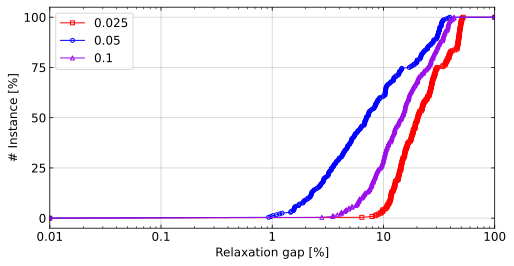

In [103]:
UbA2000 = extract_UB('AllisIntCut2000.text', 1, 5, 3, lineBeg=0)
UbA1000 = extract_UB('AllisIntCut1000.text', 1, 5, 3, lineBeg=0)
UbR2000 = extract_UB('RootisIntCut2000.text', 1, 5, 3, lineBeg=0)
UbR1000 = extract_UB('RootisIntCut1000.text', 1, 5, 3, lineBeg=0)

Ub2000 = [min(UbA2000[i], UbR2000[i]) for i in range(len(UbA2000))]
Ub1000 = [min(UbA1000[i], UbR1000[i]) for i in range(len(UbA1000))]

Lb2000 = extract_data('AllisIntCut2000.text', 5, 3)
Lb1000 = extract_data('AllisIntCut1000.text', 5, 3)

RLUratio1 = compute_ratio(Ub1000, Lb1000, Ub1000)
RLUratio2 = compute_ratio(Ub2000, Lb2000, Ub2000)

for i in range(10):
    print(Lb2000[i], " ", Lb1000[i])

rLU1 = RLUratio1[0:120] + RLUratio2[0:120]
rLU2 = RLUratio1[120:240] + RLUratio2[120:240]
rLU3 = RLUratio1[240:360] + RLUratio2[240:360]

x1, y1 = precoess_data(rLU1)
x2, y2 = precoess_data(rLU2)
x3, y3 = precoess_data(rLU3)

revise_data(x1, y1, 0.01, 100)
revise_data(x2, y2, 0.01, 100)
revise_data(x3, y3, 0.01, 100)

markersize = 4
linewidth = 1
fontsize = 12
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(x1, y1, label='0.025', marker='s', markersize=markersize, color='r', linewidth=linewidth, markerfacecolor='none')
ax.plot(x2, y2, label='0.05', marker='o', markersize=markersize, color='b', linewidth=linewidth, markerfacecolor='none')
ax.plot(x3, y3, label='0.1', marker='^', markersize=markersize, color='#9A0EEA', linewidth=linewidth, markerfacecolor='none')

ax.set_xscale('log')
ax.set_xlim(1, 100)
ax.set_yticks([0.0, 0.25, 0.5, 0.75, 1], ['0', '25', '50', '75', '100'], fontsize=fontsize)
ax.set_xticks([0.01, 0.1, 1, 10, 100], ['0.01', '0.1', '1', '10', '100'], fontsize=fontsize)
ax.set_xlabel('Relaxation gap [%]', fontsize=fontsize)
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.tick_params(top='on', right='on', which='both')
ax.set_ylabel('# Instance [%]', fontsize=fontsize)
ax.grid(True, which='minor', linestyle='dashed', alpha=0)
ax.grid(True, which='major', alpha=0.6)
ax.legend(loc='upper left', fontsize=fontsize)
# plt.savefig('RelaxationGap.eps', bbox_inches='tight', pad_inches=0, format='eps')